# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
row = soup.find_all(class_='data-row')
row

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
temps_list = []

# Loop through the scraped data to create a list of rows
for r in row:
    # find all <td> elements in the row
    cells = r.find_all('td')
    # Extract the text
    id = cells[0].get_text(strip=True)
    terrestrial_date = cells[1].get_text(strip=True),
    sol = cells[2].get_text(strip=True),
    ls = cells[3].get_text(strip=True),
    month = cells[4].get_text(strip=True),
    min_temp = cells[5].get_text(strip=True),
    pressure = cells[6].get_text(strip=True)
    # Save the results to a dictionary
    summary_dict = {
        "id": id,
        "terrestrial_date": terrestrial_date,
        "sol": sol,
        "ls": ls,
        "month": month,
        "min_temp": min_temp,
        "pressure": pressure
    }
    # Append the dictionary to the list
    temps_list.append(summary_dict)
# Print the list
for item in temps_list:
    print(item) 

{'id': '2', 'terrestrial_date': ('2012-08-16',), 'sol': ('10',), 'ls': ('155',), 'month': ('6',), 'min_temp': ('-75.0',), 'pressure': '739.0'}
{'id': '13', 'terrestrial_date': ('2012-08-17',), 'sol': ('11',), 'ls': ('156',), 'month': ('6',), 'min_temp': ('-76.0',), 'pressure': '740.0'}
{'id': '24', 'terrestrial_date': ('2012-08-18',), 'sol': ('12',), 'ls': ('156',), 'month': ('6',), 'min_temp': ('-76.0',), 'pressure': '741.0'}
{'id': '35', 'terrestrial_date': ('2012-08-19',), 'sol': ('13',), 'ls': ('157',), 'month': ('6',), 'min_temp': ('-74.0',), 'pressure': '732.0'}
{'id': '46', 'terrestrial_date': ('2012-08-20',), 'sol': ('14',), 'ls': ('157',), 'month': ('6',), 'min_temp': ('-74.0',), 'pressure': '740.0'}
{'id': '57', 'terrestrial_date': ('2012-08-21',), 'sol': ('15',), 'ls': ('158',), 'month': ('6',), 'min_temp': ('-78.0',), 'pressure': '740.0'}
{'id': '68', 'terrestrial_date': ('2012-08-22',), 'sol': ('16',), 'ls': ('158',), 'month': ('6',), 'min_temp': ('-77.0',), 'pressure': '7

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
temps_list_df = pd.DataFrame(temps_list)

In [8]:
# Confirm DataFrame was created successfully
temps_list_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,"(2012-08-16,)","(10,)","(155,)","(6,)","(-75.0,)",739.0
1,13,"(2012-08-17,)","(11,)","(156,)","(6,)","(-76.0,)",740.0
2,24,"(2012-08-18,)","(12,)","(156,)","(6,)","(-76.0,)",741.0
3,35,"(2012-08-19,)","(13,)","(157,)","(6,)","(-74.0,)",732.0
4,46,"(2012-08-20,)","(14,)","(157,)","(6,)","(-74.0,)",740.0


In [9]:
# Columns extracted as a tuple in the scraping step. 
# Used a lambda to extract the first part of the tuple.  
temps_list_df["terrestrial_date"] = temps_list_df["terrestrial_date"].apply(
    lambda x: x[0] if isinstance(x, tuple) else x)
temps_list_df["sol"] = temps_list_df["sol"].apply(
    lambda x: x[0] if isinstance(x, tuple) else x)
temps_list_df["ls"] = temps_list_df["ls"].apply(
    lambda x: x[0] if isinstance(x, tuple) else x)
temps_list_df["month"] = temps_list_df["month"].apply(
    lambda x: x[0] if isinstance(x, tuple) else x)
temps_list_df["min_temp"] = temps_list_df["min_temp"].apply(
    lambda x: x[0] if isinstance(x, tuple) else x)


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
print(temps_list_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
# Change data types for data analysis
# Use pd.to_datetime and .astype funtions to change the data types as follows: 
# Change terrestrial_date to date time. 
# Change sol, ls, and month to an integer. 
# Change min_temp and pressure to floats. 
temps_list_df["terrestrial_date"] = pd.to_datetime(temps_list_df["terrestrial_date"])
temps_list_df["sol"] = temps_list_df["sol"].astype(int)
temps_list_df["ls"] = temps_list_df["ls"].astype(int)
temps_list_df["month"] = temps_list_df["month"].astype(int)
temps_list_df["min_temp"] = temps_list_df["min_temp"].astype(float)
temps_list_df["pressure"] = temps_list_df["pressure"].astype(float)
temps_list_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [12]:
# Confirm type changes were successful by examining data types again
print(temps_list_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
martian_months = temps_list_df["month"].nunique()
martian_months

12

In [14]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = temps_list_df["sol"].nunique()
martian_days

1867

In [15]:
# 3. What is the average minimum temperature by month?
# Group by the month column and perform a .mean function. 
month_group = temps_list_df.groupby("month")["min_temp"].mean()
month_group = month_group.round(2)
month_group_df = pd.DataFrame(month_group)
month_group_df = month_group_df.reset_index()
month_group_df

,month,min_temp
0,1,-77.16
1,2,-79.93
2,3,-83.31
3,4,-82.75
4,5,-79.31
5,6,-75.30
6,7,-72.28
7,8,-68.38
8,9,-69.17
9,10,-71.98


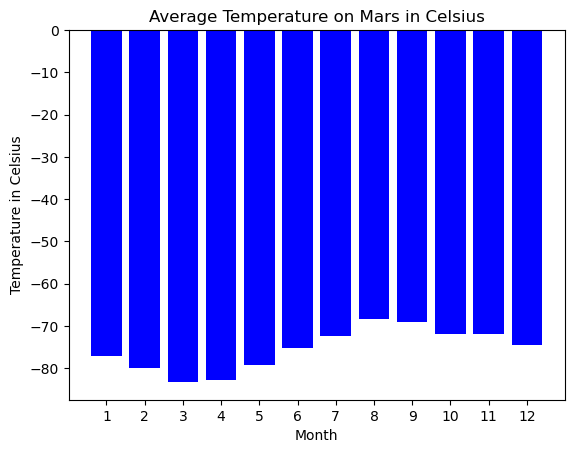

In [16]:
# Plot the average minimum temperature by month
# Use the month_group_df created in the step above. Set the ticks to the month. 
x_axis = month_group_df["month"]
y_axis = month_group_df['min_temp']
plt.xticks(ticks=x_axis)
plt.bar(x_axis, y_axis, color='b', align='center')
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")
plt.title("Average Temperature on Mars in Celsius")
plt.show()


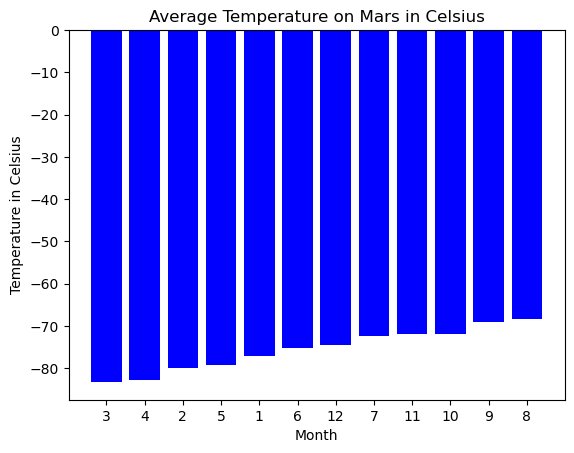

In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the month_group_df by the min_temp column. Store as a new df. 
sorted_df = month_group_df.sort_values(by="min_temp", ascending=True)

x_axis = sorted_df["month"]
y_axis = sorted_df['min_temp']
# Reset the ticks. They sort numericly by default. 
plt.xticks(ticks=range(len(x_axis)), labels=x_axis)
plt.bar(range(len(x_axis)), y_axis, color='b', align='center')
plt.xlabel("Month")
plt.ylabel("Temperature in Celsius")
plt.title("Average Temperature on Mars in Celsius")
plt.show()

In [18]:
# 4. What is the average pressure by month?
# Use a .groupby function on the temps_list_df and perform a .mean on pressure.  
pressure_group = temps_list_df.groupby("month")["pressure"].mean()
pressure_group = pressure_group.round(2)
pressure_group_df = pd.DataFrame(pressure_group)
pressure_group_df = pressure_group_df.reset_index()
pressure_group_df

,month,pressure
0,1,862.49
1,2,889.46
2,3,877.32
3,4,806.33
4,5,748.56
5,6,745.05
6,7,795.11
7,8,873.83
8,9,913.31
9,10,887.31


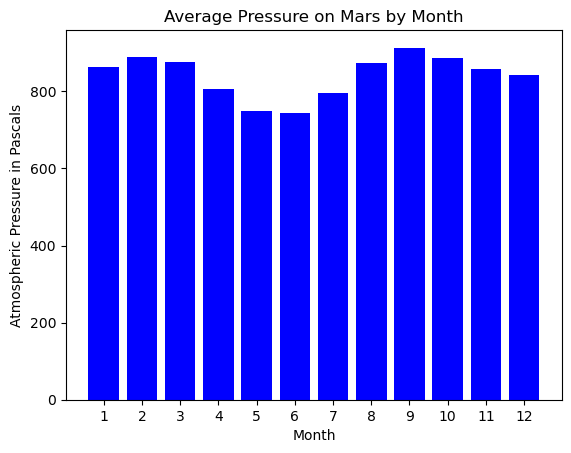

In [19]:
# Plot the average pressure by month
# Use the pressure_group_df created in the previous step. 
x_axis = pressure_group_df["month"]
y_axis = pressure_group_df['pressure']
plt.xticks(ticks=x_axis)
plt.bar(x_axis, y_axis, color='b', align='center')
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure in Pascals")
plt.title("Average Pressure on Mars by Month")
plt.show()

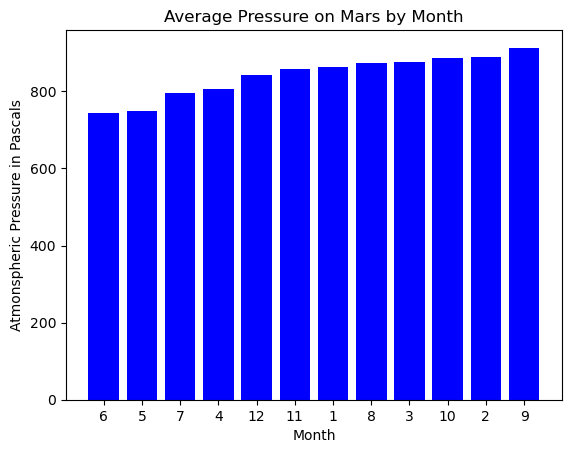

In [20]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
pressure_sorted_df = pressure_group_df.sort_values(by="pressure", ascending=True)

x_axis = pressure_sorted_df["month"]
y_axis = pressure_sorted_df['pressure']
# reset the ticks so they show the correct month. 
plt.xticks(ticks=range(len(x_axis)), labels=x_axis)
plt.bar(range(len(x_axis)), y_axis, color='b', align='center')
plt.xlabel("Month")
plt.ylabel("Atmonspheric Pressure in Pascals")
plt.title("Average Pressure on Mars by Month")
plt.show()

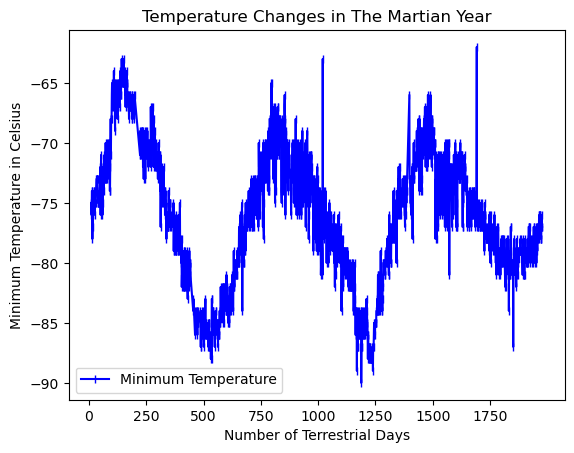

In [21]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
days = temps_list_df["sol"]
temp = temps_list_df["min_temp"]

plt.plot(days, temp, marker = '|', color='blue', label="Minimum Temperature")
plt.xticks(ticks=range(0, max(days) + 1, 250))
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature in Celsius')
plt.title("Temperature Changes in The Martian Year")
plt.legend()

plt.show()

#### Minimum Temperature

Based on the bar graph, "Average Temperature on Mars in Celsius", March is the coldest month of the Martian year. The average minimum temperature in March is approximately -85 degrees Celsius. This is a 15 degree difference from the warmest average month, August, with a balmy -70 degrees Celsius average minimum temperature. 

#### Atmospheric Pressure

A review of the graph "Average Pressure on Mars by Month" shows an average minimum pressure of about 750 Pa in  June. September has the highest average pressure at about 950 Pa. 

Note: According to the website science.nasa.gov, the Curiosity measures atmospheric pressure in the unit Pascals (Pa). Source: NASA (2012, November 15). Pressure Cycles on Mars. NASA.gov. Retrieved March 9, 2025, from https://science.nasa.gov/resource/pressure-cycles-on-mars/

#### Year Length

One Martian year is equal to 1895 Terrestrial days. This is approximately 5.2 Earth years. The graph "Temperature Changes in The Martian Year" provides a visual representation of the temperature cycles in the Martian year. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
temps_list_df.to_csv("Output/mars_news_2.csv", index = False, header = True)

In [23]:
browser.quit()